# **Alejandro Londoño Valencia - Código 104202425942**
***Actividad individual II Taller***

**Predicción de Ventas con Regresión Lineal Simple**

**Objetivo:** Aplicar los fundamentos de Machine Learning para construir un modelo de Regresión Lineal Simple usando Scikit-learn. Esto incluye preparar los datos, entrenar el modelo, realizar predicciones y evaluar su rendimiento utilizando métricas estándar.

**Parte 1: Carga y Exploración Inicial (Pandas)**
**1. Carga de Datos:** Carga el archivo advertising.csv en un DataFrame de Pandas.
**2. Inspección Básica:**
-	Muestra las primeras 5 filas.
-	Obtén información general (.info()).
-	Obtén estadísticas descriptivas (.describe()).
-	Verifica si hay valores nulos. (Este dataset usualmente está limpio, pero es buena práctica verificar).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# carga el conjunto de datos
# Ruta al archivo CSV en Google Drive
file_path = '/content/drive/MyDrive/TMP/advertising.csv'

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(df.head())

# Obtener información general del DataFrame
info = df.info()

# Obtener estadísticas descriptivas del DataFrame
describe = df.describe()

# Verificar si hay valores nulos en el DataFrame
null_values = df.isnull().sum()

info, describe, null_values

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(None,
                TV       Radio   Newspaper       Sales
 count  200.000000  200.000000  200.000000  200.000000
 mean   147.042500   23.264000   30.554000   15.130500
 std     85.854236   14.846809   21.778621    5.283892
 min      0.700000    0.000000    0.300000    1.600000
 25%     74.375000    9.975000   12.750000   11.000000
 50%    149.750000   22.900000   25.750000   16.000000
 75%    218.825000   36.525000   45.100000   19.050000
 max    296.400000   49.600000  114.000000   27.000000,
 TV           0
 Radio        0
 Newspaper    0
 Sales        0
 dtype: int64)

Puede observarse que el archivo se carga normalmente, se obtiene la información solicitada y no se detectan valors nulos.

**Parte 2: Visualización Exploratoria (Matplotlib/Seaborn)**
**3. Relación Visual:**
-	Crea un gráfico de dispersión (scatterplot) usando Seaborn o Matplotlib para visualizar la relación entre la inversión en TV (eje X) y las Sales (eje Y).
-	¿Observas alguna tendencia visual que sugiera que una regresión lineal podría ser apropiada?


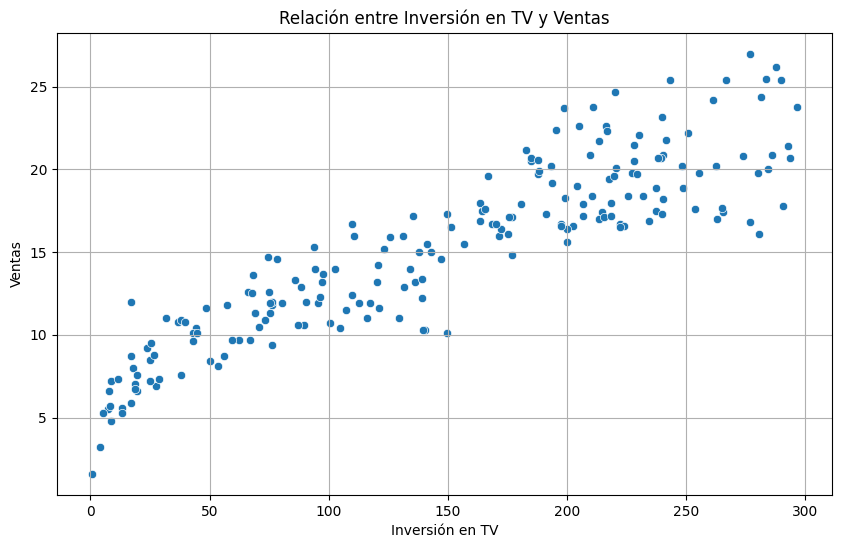

In [3]:
# Gráfico de dispersión usando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('Relación entre Inversión en TV y Ventas')
plt.xlabel('Inversión en TV')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

## Análisis del gráfico de dispersión

Se observa una clara tendencia positiva: a medida que aumenta la inversión en TV, las ventas tienden a incrementarse.

Los puntos siguen un patrón ascendente, aunque con cierta dispersión, especialmente en valores altos de inversión.

La relación parece aproximadamente lineal, aunque podría haber una ligera curvatura o saturación en los valores más altos (las ventas no crecen indefinidamente al aumentar la inversión).

Una regresión lineal podría ser apropiada para modelar esta relación, ya que existe una tendencia general ascendente y la dispersión alrededor de una línea recta no es excesiva.Sin embargo, si se busca mayor precisión en los extremos (inversiones grandes), podría también analizarse con un modelo no lineal, pero para un análisis inicial, la regresión lineal es una opción válida de acuerdo con lo que se puede observar.

**Parte 3: Preparación de Datos para el Modelo (Pandas & Scikit-learn)**

**Selección de Variables:**
-	Define tu variable independiente (característica) X. Debe ser la columna TV. Importante: Para Scikit-learn, X debe ser un DataFrame o un array 2D, así que selecciona la columna como df[['TV']].
- Define tu variable dependiente (objetivo) y. Debe ser la columna Sales (puede ser una Serie de Pandas df['Sales']).

**División en Conjuntos de Entrenamiento y Prueba:**
o	Importa train_test_split de sklearn.model_selection.
o	Divide los datos X e y en conjuntos de entrenamiento (X_train, y_train) y de prueba (X_test, y_test). Utiliza un test_size de 0.3 (30% para prueba) y un random_state (ej. random_state=42) para asegurar que la división sea la misma cada vez que se ejecute el código (reproducibilidad).

In [5]:
# Define la variable independiente X (característica)
X = df[['TV']]

# Define la variable dependiente y (objetivo)
y = df['Sales']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Muestra las dimensiones de los conjuntos resultantes
print("Dimensiones de los conjuntos de entrenamiento y prueba:")
X_train.shape, X_test.shape, y_train.shape, y_test.shape


Dimensiones de los conjuntos de entrenamiento y prueba:


((140, 1), (60, 1), (140,), (60,))

**Parte 4: Construcción y Entrenamiento del Modelo (Scikit-learn)**

**Creación del Modelo:**
-	Importa LinearRegression de sklearn.linear_model.
-	Crea una instancia del modelo: modelo = LinearRegression().

**Entrenamiento:**
-	Entrena el modelo utilizando los datos de entrenamiento: modelo.fit(X_train, y_train).

In [6]:
# Crea una instancia del modelo de regresión lineal
modelo = LinearRegression()

# Entrena el modelo utilizando los datos de entrenamiento
modelo.fit(X_train, y_train)


LinearRegression()

**Parte 5: Análisis del Modelo y Predicciones (Scikit-learn)**

**Coeficientes del Modelo:**
-	Muestra el intercepto (ordenada al origen) del modelo: modelo.intercept_.
-	Muestra el coeficiente para la variable TV: modelo.coef_.
-	Interpretación: Explica qué significan estos dos valores en el contexto del problema (¿Cuál es la venta base estimada si no se invierte en TV? ¿Cuánto se espera que aumenten las ventas por cada unidad adicional invertida en TV?).

**Predicciones:**
-	Utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba: y_pred = modelo.predict(X_test).


In [7]:
# Muestra el intercepto del modelo
intercept = modelo.intercept_

# Muestra el coeficiente para la variable TV
coefficient = modelo.coef_[0]

# Hace predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

intercept, coefficient, y_pred

(np.float64(7.206554548173251),
 np.float64(0.05483488379527939),
 array([16.16109107, 17.92129084, 23.26769201,  7.84812269, 19.28667945,
        11.32465432, 19.09475735,  9.94829874, 19.4018327 , 16.8081427 ,
         8.93385339, 10.28827502, 20.0653348 ,  7.50266292, 14.85602084,
        16.53945177,  7.6068492 , 18.04192759, 11.3356213 , 20.22435596,
        19.79116038, 10.92435967,  9.29028013, 20.96462689, 10.99016153,
        10.14022083, 18.91380224, 14.84505386, 11.98815642,  7.66716757,
        18.16256433, 11.00112851, 18.11321294,  8.13326408, 22.59870643,
        20.26822387,  9.85507944, 22.21486224, 13.63320293,  8.71451385,
        13.56740107, 16.91232898,  9.56993804, 10.62276781, 19.48956852,
         9.30124711, 11.07789734, 15.28373293, 12.94228339, 11.39045618,
        11.49464246, 16.44074898,  7.68361804,  7.63426664, 11.39593967,
        14.30218851, 11.23143502, 23.09222038,  8.28131827, 18.04192759]))

**1. Intercepto del modelo**

El intercepto (intercept) es el valor de la variable dependiente (ventas) cuando la variable independiente (TV) es igual a cero. En este caso, el valor del intercepto es:

$$
7.206554548173251
$$

Esto significa que, según el modelo, si no se invierte nada en televisión, las ventas esperadas serían aproximadamente 7.21 unidades (la unidad dependerá del contexto de los datos originales, por ejemplo, miles de unidades).

**2. Coeficiente para la variable TV**

El coeficiente (coefficient) indica cuánto se espera que cambien las ventas por cada unidad adicional invertida en televisión. El valor obtenido es:

$$
0.05483488379527939
$$

Esto quiere decir que, por cada unidad adicional de inversión en TV, las ventas aumentan en promedio 0.0548 unidades.

**3. Predicciones sobre el conjunto de prueba**

El arreglo (y_pred) contiene las predicciones de ventas que hace el modelo para los valores de TV del conjunto de prueba (X_test). Cada valor representa la venta estimada por el modelo para un nivel específico de inversión en TV, por ejemplo, el primer valor predicho es 16.16, el segundo 17.92, y así sucesivamente.

Estas predicciones se calculan usando la ecuación de la recta de regresión:

$$
\text{Ventas predichas} = \text{intercepto} + (\text{coeficiente} \times \text{TV})
$$

**Parte 6: Evaluación del Modelo (Scikit-learn & Interpretación)**

**Cálculo de Métricas:**
-	Importa mean_absolute_error, mean_squared_error, y r2_score de sklearn.metrics.
-	Calcula las siguientes métricas comparando y_test (valores reales) con y_pred (valores predichos):
  - Error Absoluto Medio (MAE)
  - Error Cuadrático Medio (MSE)
  - Raíz del Error Cuadrático Medio (RMSE) - Calcúlalo como np.sqrt(MSE).
  - Coeficiente de Determinación (R²)
-	Muestra los valores de estas métricas.

**Interpretación de Métricas:**
-	Explica qué significa cada una de las métricas calculadas en el contexto de este problema:
  -	MAE: ¿Cuál es el error promedio absoluto en las predicciones de ventas? (en las mismas unidades que Sales).
  - RMSE: Similar al MAE, pero penaliza más los errores grandes. ¿Cuál es el error típico en las predicciones? (en las mismas unidades que Sales).
  - R²: ¿Qué porcentaje de la variabilidad en las ventas (Sales) es explicado por la inversión en TV según tu modelo? (Valor entre 0 y 1, o 0% y 100%).

In [15]:
# Calcula el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcula el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcula la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

# Calcula el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)

print("Métricas del modelo (MAE, MSE, RMSE y R²):")
mae, mse, rmse, r2


Métricas del modelo (MAE, MSE, RMSE y R²):


(1.8069123776641516,
 5.179525402166653,
 np.float64(2.2758570698017597),
 0.814855389208679)

**MAE (Error Absoluto Medio)**
- Valor obtenido: 1.81
- Interpretación: El MAE indica el error promedio absoluto entre las predicciones del modelo y los valores reales de ventas. En este caso, el modelo se equivoca en promedio 1.81 unidades de ventas respecto al valor real, usando las mismas unidades que la variable *Sales*.

**MSE (Error Cuadrático Medio)**
- Valor obtenido: 5.18
- Interpretación: El MSE mide el promedio de los errores al cuadrado. Es útil para penalizar errores grandes, pero su valor está en unidades cuadradas, por lo que su interpretación directa no es tan intuitiva como la del MAE.

**RMSE (Raíz del Error Cuadrático Medio)**
- Valor obtenido: 2.28
- Interpretación: El RMSE es la raíz cuadrada del MSE, lo que permite interpretar el error típico en las mismas unidades de *Sales*. En este caso, el error típico de las predicciones es de aproximadamente 2.28 unidades de ventas. El RMSE penaliza más los errores grandes que el MAE, por lo que si hay errores atípicamente altos, este valor será mayor que el MAE.

**R² (Coeficiente de determinación)**
- Valor obtenido: 0.81
- Interpretación: El R² indica qué proporción de la variabilidad total en las ventas (*Sales*) es explicada por la inversión en TV según tu modelo. Un valor de 0.81 significa que el 81% de la variabilidad observada en las ventas puede ser explicada por el modelo usando la inversión en TV como variable predictora. El 19% restante corresponde a variabilidad no explicada por el modelo, posiblemente debida a otras variables no incluidos o al azar.

Así las cosas, el modelo tiene un aceptable poder explicativo, aunque no perfecto, con errores relativamente bajos y una alta capacidad para explicar la variabilidad de las ventas en función de la inversión en TV.

**Parte 7: Visualización del Modelo (Matplotlib/Seaborn)**

**Gráfico de Regresión:**
-	Crea un gráfico de dispersión (scatterplot) de los datos de prueba (X_test vs y_test).
-	Superpón la línea de regresión obtenida por tu modelo. Puedes graficar X_test vs y_pred (las predicciones) como una línea sobre el scatter plot.
-	Añade títulos y etiquetas adecuadas. ¿Visualmente, parece que la línea se ajusta bien a los datos de prueba?

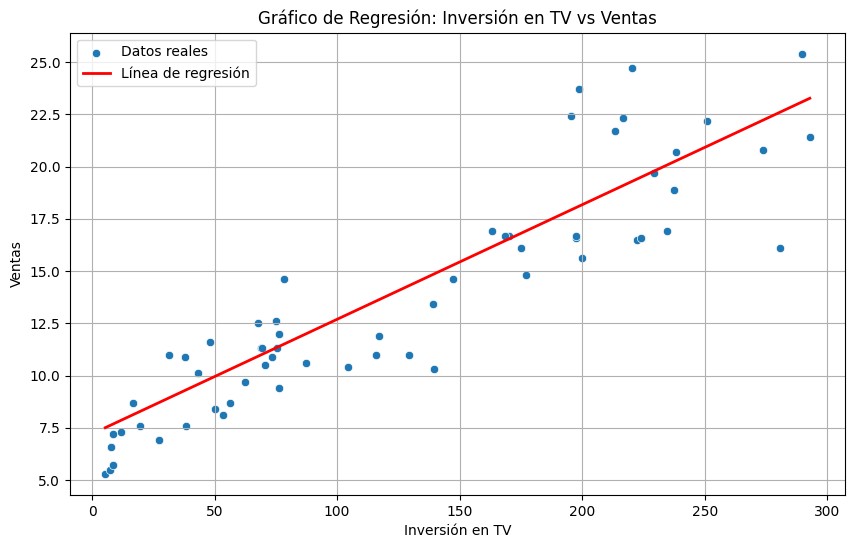

In [16]:
# Crear un gráfico de dispersión de los datos de prueba
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['TV'], y=y_test, label='Datos reales')

# Ordenar los valores para la línea de regresión
X_test_sorted = X_test.sort_values(by='TV')
y_pred_sorted = modelo.predict(X_test_sorted)

# Superponer la línea de regresión
plt.plot(X_test_sorted['TV'], y_pred_sorted, color='red', linewidth=2, label='Línea de regresión')

# Añadir títulos y etiquetas
plt.title('Gráfico de Regresión: Inversión en TV vs Ventas')
plt.xlabel('Inversión en TV')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


La línea de regresión se ajusta bien a los datos de prueba, lo que indicaría que la inversión en TV es un buen predictor de las ventas. Esto se refleja en el alto valor del coeficiente de determinación (R²) que es superior a 0.8, indicando un buen ajuste del modelo.